In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `z

Linear SVM - Training Data Evaluation:
[[11 31  0  0  0  0]
 [ 1 43  0  0  0  0]
 [ 2 10  0  0  0  0]
 [ 0  4  0  0  0  2]
 [ 0  3  0  0  2  0]
 [ 0  2  0  0  0 17]]
              precision    recall  f1-score   support

           1       0.79      0.26      0.39        42
           2       0.46      0.98      0.63        44
           3       0.00      0.00      0.00        12
           5       0.00      0.00      0.00         6
           6       1.00      0.40      0.57         5
           7       0.89      0.89      0.89        19

    accuracy                           0.57       128
   macro avg       0.52      0.42      0.41       128
weighted avg       0.59      0.57      0.50       128

Linear SVM - Testing Data Evaluation:
[[ 1 27  0  0  0  0]
 [ 2 28  0  0  1  1]
 [ 2  3  0  0  0  0]
 [ 0  5  0  2  0  0]
 [ 0  1  0  0  0  3]
 [ 0  0  0  0  0 10]]
              precision    recall  f1-score   support

           1       0.20      0.04      0.06        28
           2     

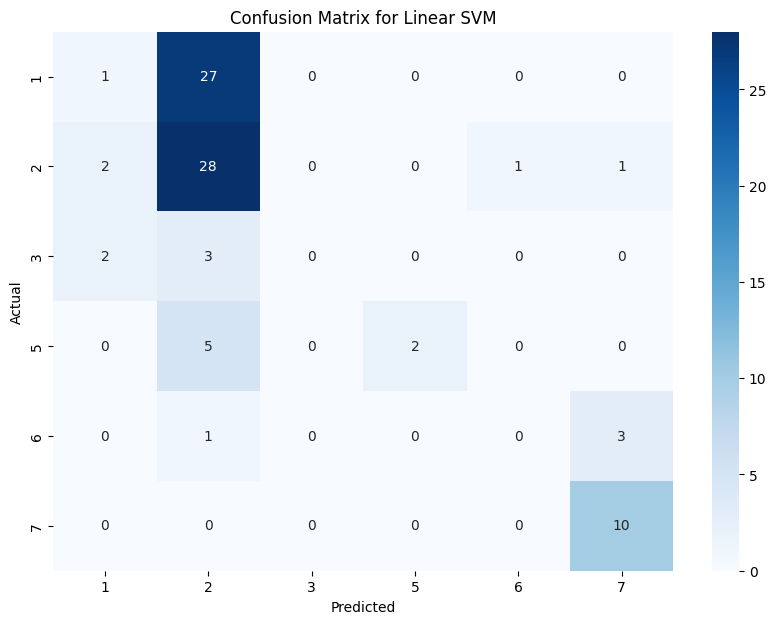

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and 

ANN (MLPClassifier) - Training Data Evaluation:
[[27 15  0  0  0  0]
 [33 11  0  0  0  0]
 [ 7  5  0  0  0  0]
 [ 0  5  0  0  0  1]
 [ 1  4  0  0  0  0]
 [14  4  0  0  0  1]]
              precision    recall  f1-score   support

           1       0.33      0.64      0.44        42
           2       0.25      0.25      0.25        44
           3       0.00      0.00      0.00        12
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         5
           7       0.50      0.05      0.10        19

    accuracy                           0.30       128
   macro avg       0.18      0.16      0.13       128
weighted avg       0.27      0.30      0.24       128

ANN (MLPClassifier) - Testing Data Evaluation:
[[19  9  0  0  0  0]
 [21 11  0  0  0  0]
 [ 4  1  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 1  3  0  0  0  0]
 [10  0  0  0  0  0]]
              precision    recall  f1-score   support

           1       0.35      0.68      0.46        28

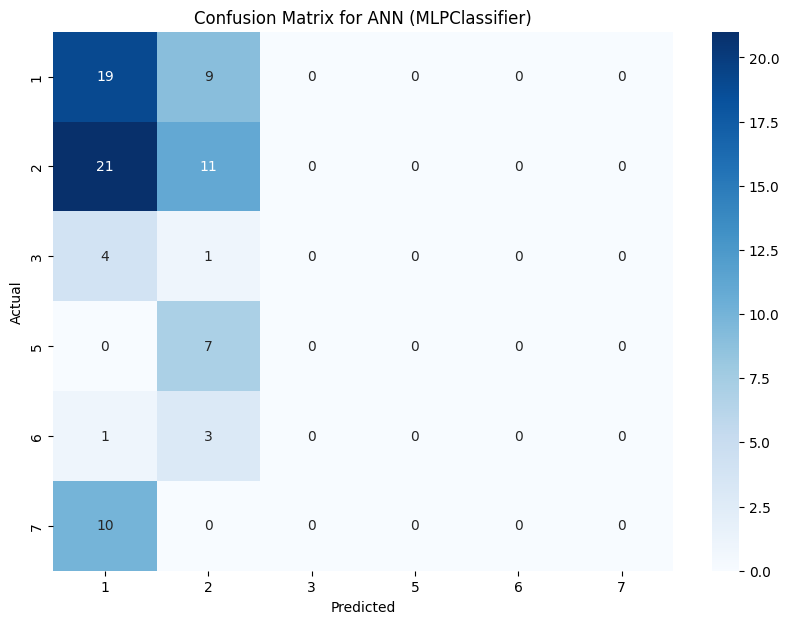

In [ ]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
# Function to visualize confusion matrix
def plot_confusion_matrix(conf_matrix, model_name, class_names):
    plt.figure(figsize=(10,7))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Load the new dataset from the provided path
path_to_csv = '/content/gdrive/My Drive/glass.csv'
df_glass = pd.read_csv(path_to_csv)

# Separate the target variable (Type) from the feature variables
y_glass = df_glass['Type'].values
X_glass = df_glass.drop('Type', axis=1).values

# Split the dataset into training and testing sets
X_train_glass, X_test_glass, y_train_glass, y_test_glass = train_test_split(X_glass, y_glass, test_size=0.4, random_state=42)

# Linear SVM
linear_svm = LinearSVC(max_iter=10000, random_state=42)
linear_svm.fit(X_train_glass, y_train_glass)
predict_train_svm = linear_svm.predict(X_train_glass)
predict_test_svm = linear_svm.predict(X_test_glass)
print("Linear SVM - Training Data Evaluation:")
print(confusion_matrix(y_train_glass, predict_train_svm))
print(classification_report(y_train_glass, predict_train_svm))
print("Linear SVM - Testing Data Evaluation:")
conf_matrix_test_svm = confusion_matrix(y_test_glass, predict_test_svm)
print(conf_matrix_test_svm)
print(classification_report(y_test_glass, predict_test_svm))
# Visualization for Linear SVM
plot_confusion_matrix(conf_matrix_test_svm, "Linear SVM", class_names=np.unique(y_glass))


# ANN (MLPClassifier)
mlp_glass = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp_glass.fit(X_train_glass, y_train_glass)
predict_train_ann = mlp_glass.predict(X_train_glass)
predict_test_ann = mlp_glass.predict(X_test_glass)
print("ANN (MLPClassifier) - Training Data Evaluation:")
print(confusion_matrix(y_train_glass, predict_train_ann))
print(classification_report(y_train_glass, predict_train_ann))
print("ANN (MLPClassifier) - Testing Data Evaluation:")
conf_matrix_test_ann = confusion_matrix(y_test_glass, predict_test_ann)
print(conf_matrix_test_ann)
print(classification_report(y_test_glass, predict_test_ann))

# Visualization for ANN
plot_confusion_matrix(conf_matrix_test_ann, "ANN (MLPClassifier)", class_names=np.unique(y_glass))
